In [3]:
import pandas as pd

df = pd.read_csv("~/Desktop/kidlit/data/books_llm_tags.csv")
df.head()
df.info()
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            590 non-null    object
 1   author           590 non-null    object
 2   goodreads_url    590 non-null    object
 3   ol_title         590 non-null    object
 4   ol_author        590 non-null    object
 5   cover_url        589 non-null    object
 6   openlibrary_url  590 non-null    object
 7   description      590 non-null    object
 8   title_clean      590 non-null    object
 9   author_clean     590 non-null    object
 10  summary_gpt      590 non-null    object
 11  themes           590 non-null    object
 12  tone             590 non-null    object
 13  age_range        590 non-null    object
 14  needs_fix        590 non-null    bool  
dtypes: bool(1), object(14)
memory usage: 65.2+ KB


,title,author,goodreads_url,ol_title,ol_author,cover_url,openlibrary_url,description,title_clean,author_clean,summary_gpt,themes,tone,age_range,needs_fix
count,590,590,590,590,590,589,590,590,590,590,590,590,590,590,590
unique,589,322,590,587,321,587,588,586,589,322,589,576,92,33,1
top,Stone Soup,Dr. Seuss,https://www.goodreads.com/book/show/19543.Wher...,Madeline's Rescue,Dr. Seuss,https://covers.openlibrary.org/b/id/3344204-L.jpg,https://openlibrary.org/works/OL1981005W,"A hound rescues a schoolgirl from the Seine, b...",Stone Soup,Dr. Seuss,A collection of humorous poems and drawings fo...,"imagination, friendship, adventure",whimsical,3-5,False
freq,2,26,1,2,26,2,2,2,2,26,2,5,133,202,590


<Axes: >

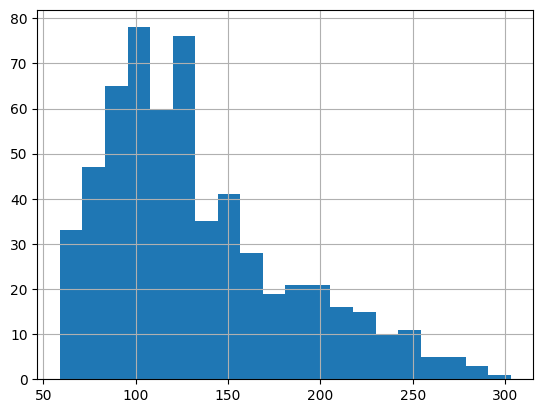

In [4]:
df["summary_length"] = df["summary_gpt"].str.len()
df["summary_length"].hist(bins=20)

<Axes: title={'center': 'Books per Age Range'}, xlabel='age_range'>

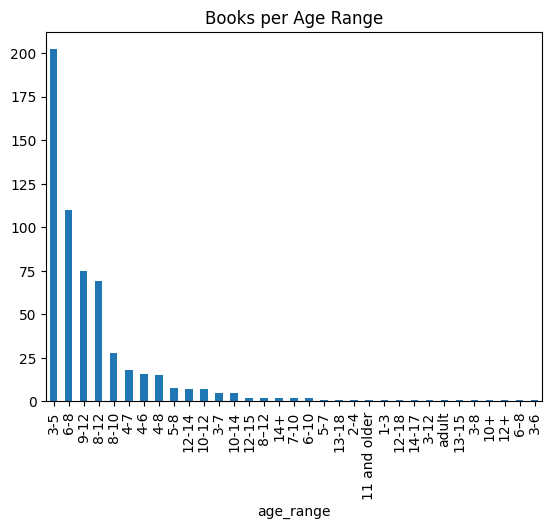

In [5]:
df["age_range"].value_counts().plot(kind="bar", title="Books per Age Range")


<Axes: title={'center': 'Tone Distribution'}, xlabel='tone'>

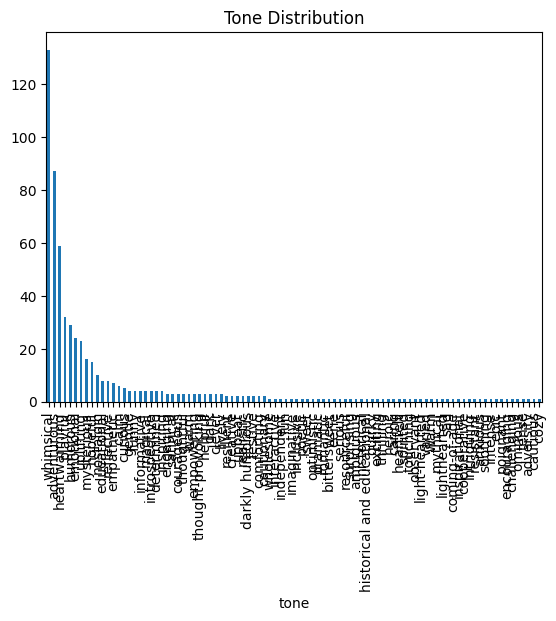

In [6]:
df["tone"].value_counts().plot(kind="bar", title="Tone Distribution")


In [7]:
print(df["tone"].value_counts().head(20))

tone
whimsical        133
adventurous       87
heartwarming      59
playful           32
humorous          29
emotional         24
uplifting         23
mysterious        16
hopeful           15
nostalgic         10
educational        8
reflective         8
empathetic         7
calm               6
curious            5
gentle             4
funny              4
informative        4
magical            4
introspective      4
Name: count, dtype: int64


<Axes: title={'center': 'Most Common Themes'}, xlabel='themes_list'>

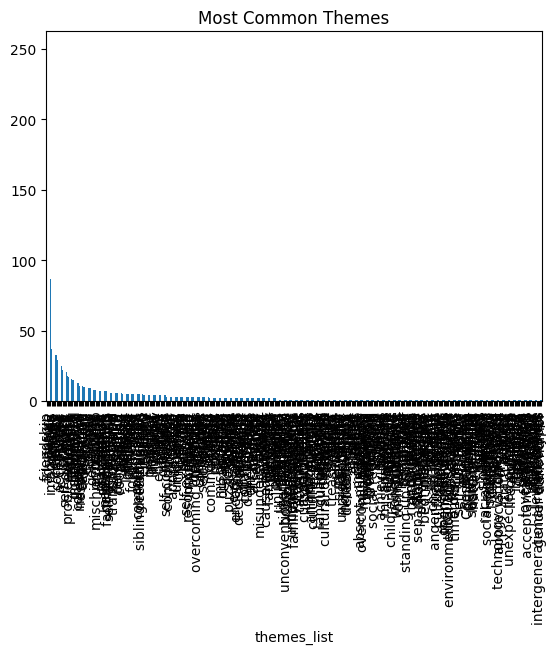

In [8]:
df["themes_list"] = df["themes"].str.split(", ")
theme_counts = df.explode("themes_list")["themes_list"].value_counts()
theme_counts.plot(kind="bar", title="Most Common Themes")

In [9]:
print(theme_counts.head(30))

themes_list
friendship         250
adventure          121
family             103
imagination         87
identity            37
magic               34
courage             33
loyalty             33
creativity          33
community           29
humor               26
acceptance          26
nature              25
bravery             22
love                21
self-discovery      21
mystery             21
problem-solving     18
kindness            17
curiosity           17
resilience          16
teamwork            15
individuality       15
belonging           15
good vs. evil       14
survival            13
consequences        13
independence        11
responsibility      11
exploration         11
Name: count, dtype: int64


In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans

df["tags"] = df["themes"] + " " + df["tone"]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df["tags"])

kmeans = KMeans(n_clusters=4, random_state=42)
df["cluster"] = kmeans.fit_predict(X)